In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Numpy
## Useful Methods

In [5]:
# Three equally spaced points between 0 and 5
np.linspace(0, 5, 3)

# Identity Matrix
np.eye(4)

array([[1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.]])

## Random-Stuff

In [6]:
# Uniformly distributed
np.random.rand(5)

array([0.91233331, 0.50075915, 0.95148423, 0.46168762, 0.62613445])

In [7]:
# Standard Normal Distribution
np.random.randn(5)

array([-1.36879228, -0.13840601,  1.43494522, -0.96486304,  0.685614  ])

In [8]:
# Random Integers
np.random.randint(1,7, 10)

array([6, 2, 3, 1, 2, 5, 6, 4, 4, 2])

## Reshaping

In [9]:
a = np.random.randint(0,50,10)
a

array([26, 45,  5, 23, 40, 10, 16, 36, 15, 16])

In [10]:
ra = a.reshape(5,2)
ra

array([[26, 45],
       [ 5, 23],
       [40, 10],
       [16, 36],
       [15, 16]])

In [11]:
ra.argmin()

2

## Indexing and Selection  

- Broadcasting

**NOTE** Slices return views of array, not copies! For copying use `arr.copy()`

----

In [12]:
arr = np.arange(0,11)
arr

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

In [13]:
slice_of_arr = arr[:5]
print(slice_of_arr)
slice_of_arr[:] = 99 # BROADCASTING
print(slice_of_arr)
print(arr)

[0 1 2 3 4]
[99 99 99 99 99]
[99 99 99 99 99  5  6  7  8  9 10]


# Pandas
## Hierarchical Indexing

In [14]:
arr = np.random.randn(6,2)
print(arr)
df = pd.DataFrame(arr)
print(df)

[[-0.12105265  0.90772302]
 [ 1.94714378 -0.32442131]
 [-0.54516304  0.27113256]
 [ 1.37452047 -0.0895632 ]
 [ 0.35994971 -0.3009301 ]
 [ 0.82784196  0.72831557]]
          0         1
0 -0.121053  0.907723
1  1.947144 -0.324421
2 -0.545163  0.271133
3  1.374520 -0.089563
4  0.359950 -0.300930
5  0.827842  0.728316


In [15]:
groups = ["G1"]*3 + ["G2"]*3
nums = [1, 2, 3, 1, 2, 3]

df.index=pd.MultiIndex.from_tuples(zip(groups, nums))
df.index.names = ["groups", "nums"]

In [16]:
df

0         1
groups nums                    
G1     1    -0.121053  0.907723
       2     1.947144 -0.324421
       3    -0.545163  0.271133
G2     1     1.374520 -0.089563
       2     0.359950 -0.300930
       3     0.827842  0.728316

In [17]:
df.loc["G2"].loc[2]

0    0.35995
1   -0.30093
Name: 2, dtype: float64

In [18]:
df.xs(2, level=1)

0         1
groups                    
G1      1.947144 -0.324421
G2      0.359950 -0.300930

In [19]:
df = pd.DataFrame({
    "group": "g1 g1 g2 g2 g1".split(),
    "a": "a b c d e".split(), 
    "b": "f g h i j".split(),
    })
df

group  a  b
0    g1  a  f
1    g1  b  g
2    g2  c  h
3    g2  d  i
4    g1  e  j

In [20]:
df.apply(lambda row: list(row), axis=1)

0    [g1, a, f]
1    [g1, b, g]
2    [g2, c, h]
3    [g2, d, i]
4    [g1, e, j]
dtype: object

In [21]:
df.groupby("group").agg(lambda x: list(x))

a          b
group                      
g1     [a, b, e]  [f, g, j]
g2        [c, d]     [h, i]

## Merging and Joining
- `df1.join(df2)` joins **only on index** but is faster than `pd.merge(df1, df2, on=COLNAME)`

# Matplotlib
## Functional Interface

Text(0.5, 1.0, 'FUNCTIONAL Plot')

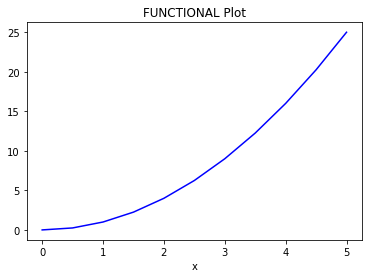

In [22]:
x = np.linspace(0,5,11)
y = x**2
# FUNCTIONAL
plt.plot(x,y, "b")
plt.xlabel("x")
plt.title("FUNCTIONAL Plot")

## Object Oriented Interface (Better)

Text(0.5, 1.0, 'OOP PLOT')

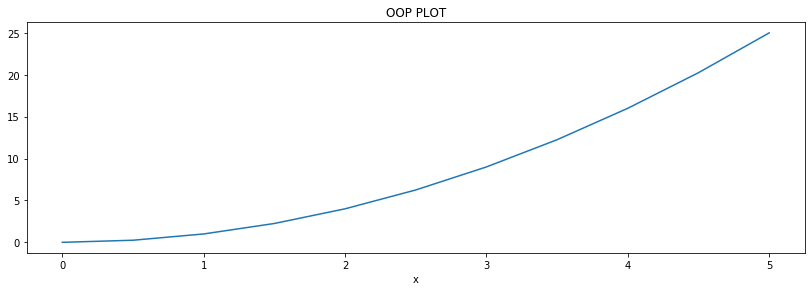

In [23]:
x = np.linspace(0,5,11)
y = x**2

# OOP
fig = plt.figure()

# left, bottom, width, heidht of axes
ax = fig.add_axes([0.1, 0.1, 1.8, 0.8])
ax.plot(x,y)
ax.set_xlabel("x")
ax.set_title("OOP PLOT")

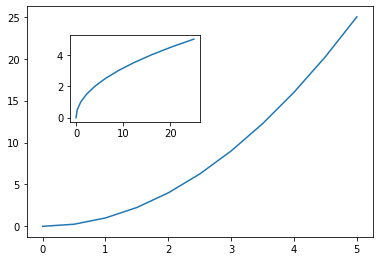

In [24]:
fig = plt.figure()
ax1 = fig.add_axes([0.1, 0.1, 0.8, 0.8])
ax1.plot(x,y)
ax2 = fig.add_axes([0.2, 0.5, 0.3, 0.3])
ax2.plot(y,x)

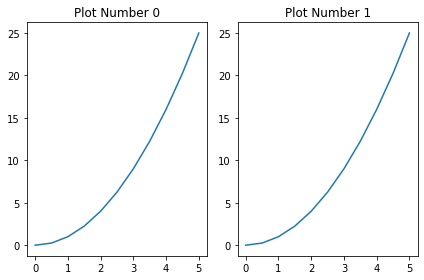

In [25]:
fig, axes = plt.subplots(1,2)

for a in axes:
    n = np.where(axes == a)[0][0]
    a.plot(x,y)
    a.set_title("Plot Number " + str(n))

plt.tight_layout() # To prevent overlap

## Other Parameters

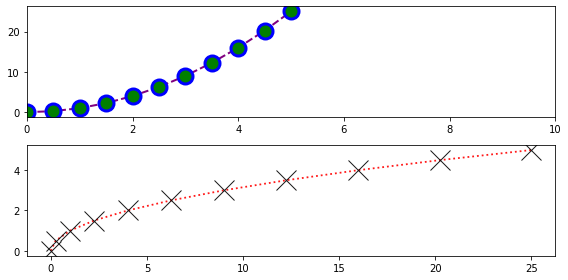

In [26]:
plt.style.use("fast")
fig, axes = plt.subplots(2, 1, figsize=(8,4))

axes[0].plot(x,y, color="purple", linewidth=2, linestyle="--", marker="o", markersize=15, markeredgecolor="blue", markerfacecolor="green", markeredgewidth=3)
axes[1].plot(y,x, color="red", alpha=0.9, lw=1.8, ls=":", marker="x", ms=20, mec="black") # lw <=> linewidth and ls <=> linestyle and mfc=markerfacecolor etc.
axes[0].set_xlim(0,10)
plt.tight_layout()

In [27]:
help(axes[0].plot)

Help on method plot in module matplotlib.axes._axes:

plot(*args, scalex=True, scaley=True, data=None, **kwargs) method of matplotlib.axes._subplots.AxesSubplot instance
    Plot y versus x as lines and/or markers.
    
    Call signatures::
    
        plot([x], y, [fmt], *, data=None, **kwargs)
        plot([x], y, [fmt], [x2], y2, [fmt2], ..., **kwargs)
    
    The coordinates of the points or line nodes are given by *x*, *y*.
    
    The optional parameter *fmt* is a convenient way for defining basic
    formatting like color, marker and linestyle. It's a shortcut string
    notation described in the *Notes* section below.
    
    >>> plot(x, y)        # plot x and y using default line style and color
    >>> plot(x, y, 'bo')  # plot x and y using blue circle markers
    >>> plot(y)           # plot y using x as index array 0..N-1
    >>> plot(y, 'r+')     # ditto, but with red plusses
    
    You can use `.Line2D` properties as keyword arguments for more
    control on the ap

----

#### See the "Advanced matplotlib Concepts" Notebook for more details!

# Seaborn

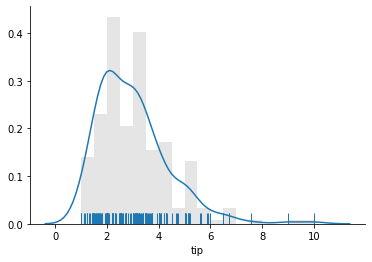

In [28]:
# RUGPLOTS!
df = sns.load_dataset("tips")
sns.rugplot(df.tip)
sns.distplot(df.tip, hist_kws=dict(alpha=0.2, color="0.5"))
sns.despine()

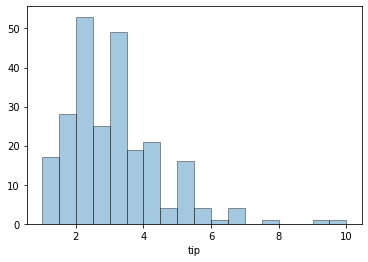

In [29]:
sns.distplot(df.tip, kde=False, hist_kws=dict(ec="k")) # Shows VALUE COUNTs on y instead of KDE

In [30]:
# Useful dict trick for (un)packing:
dict(linecolor="w", lw=0.2)

{'linecolor': 'w', 'lw': 0.2}

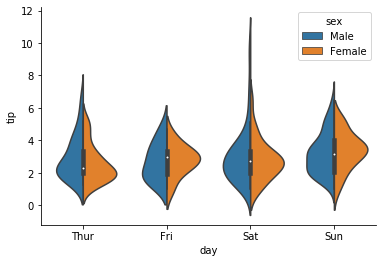

In [31]:
sns.violinplot(data=df, x="day", y="tip", hue="sex", split=True) #Split shows both hues instead of mirroring
sns.despine()

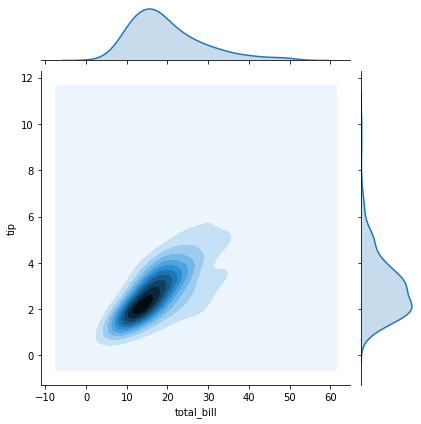

In [35]:
sns.jointplot(data=df, x="total_bill", y="tip", kind="kde")

In [29]:
df = sns.load_dataset("flights")
df.head()

year     month  passengers
0  1949   January         112
1  1949  February         118
2  1949     March         132
3  1949     April         129
4  1949       May         121

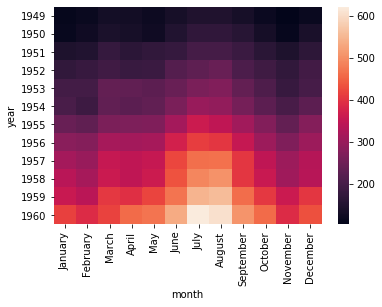

In [30]:
fp = pd.pivot_table(data=df, index="year", columns="month", values="passengers")
sns.heatmap(fp) # linecolor="w", lw=0.2

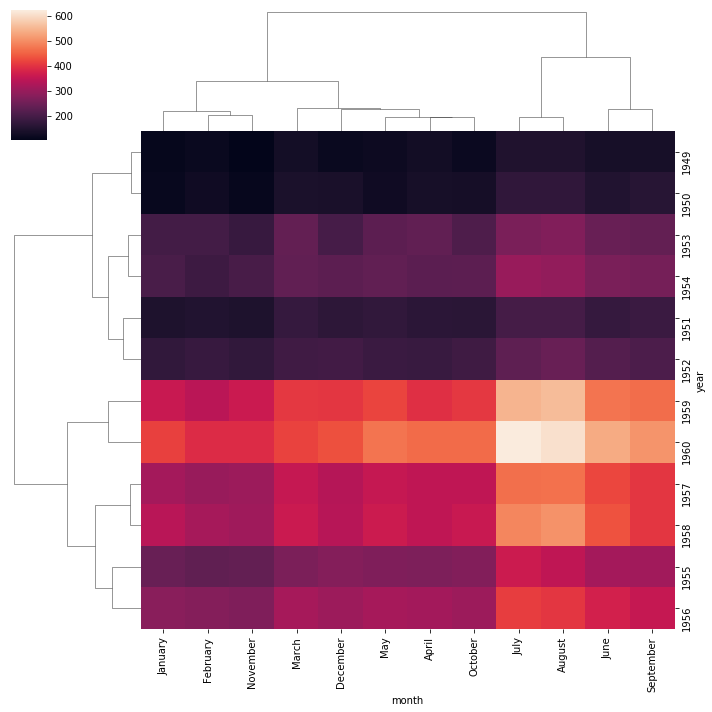

In [31]:
sns.clustermap(fp)

----

#### Clustermap shows similar months and years close to each other (Note the different order!) 

In [32]:
df.head()

year     month  passengers
0  1949   January         112
1  1949  February         118
2  1949     March         132
3  1949     April         129
4  1949       May         121

# Pandas Plotting

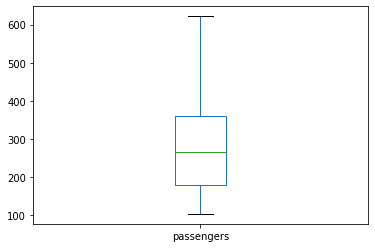

In [33]:
df.passengers.plot.box()

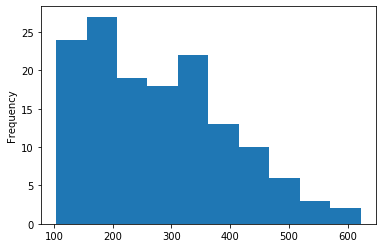

In [34]:
df.passengers.plot.hist()

## Pandas Multiindexing & GridSpecs for Plotting

In [148]:
df = pd.read_pickle("all_banks")
closes = df.xs("Close", level=1, axis=1)
std20 = closes.rolling(20).std()

closes = pd.concat([closes, std20], axis=1, keys=["close", "std20"]).swaplevel(axis=1).sort_index(axis=1)
# Hacky but works:
# closes = closes.stack(0).unstack()
closes

Bank Ticker    BAC                 C                GS              JPM  \
             close     std20   close     std20   close     std20  close   
Date                                                                      
2006-01-03   47.08       NaN  492.90       NaN  128.87       NaN  40.19   
2006-01-04   46.58       NaN  483.80       NaN  127.09       NaN  39.62   
2006-01-05   46.64       NaN  486.20       NaN  127.04       NaN  39.74   
2006-01-06   46.57       NaN  486.20       NaN  128.84       NaN  40.02   
2006-01-09   46.60       NaN  483.90       NaN  130.39       NaN  40.67   
...            ...       ...     ...       ...     ...       ...    ...   
2015-12-24   17.27  0.326391   52.71  1.223745  182.47  5.162821  66.60   
2015-12-28   17.13  0.325303   52.38  1.200603  181.62  4.919895  66.38   
2015-12-29   17.28  0.323313   52.98  1.170807  183.53  4.652792  67.07   
2015-12-30   17.05  0.300285   52.30  1.080074  182.01  3.986189  66.59   
2015-12-31   16.83  0.298445   51.75  1.052798  180.23  3.540285  66.03   

Bank Ticker               MS              WFC            
                std20  close     std20  close     std20  
Date                                                     
2006-01-03        NaN  58.31       NaN  31.90       NaN  
2006-01-04        NaN  58.35       NaN  31.53       NaN  
2006-01-05        NaN  58.51       NaN  31.50       NaN  
2006-01-06        NaN  58.57       NaN  31.68       NaN  
2006-01-09        NaN  59.19       NaN  31.68       NaN  
...               ...    ...       ...    ...       ...  
2015-12-24   1.085025  32.48  1.239223  54.82  0.786598  
2015-12-28   1.060109  32.17  1.260562  54.68  0.770094  
2015-12-29   1.074585  32.55  1.244439  55.29  0.776775  
2015-12-30   1.023749  32.23  1.155918  54.89  0.740509  
2015-12-31   1.014648  31.81  1.095879  54.36  0.735580  

[2517 rows x 12 columns]

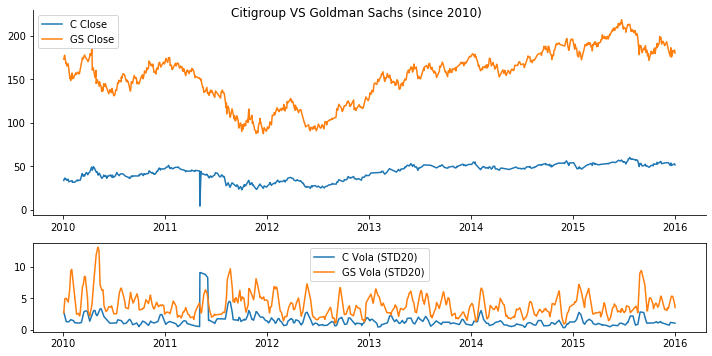

In [182]:
fig = plt.figure(figsize=(10,5))
gs = plt.GridSpec(3, 1)
ax1 = fig.add_subplot(gs[:2, 0])
ax2 = fig.add_subplot(gs[2, 0])

idx = pd.IndexSlice
# Using an IndexSlice (idx) instead of .loc[:, [slice("C"), slice("close")]]
ax1.plot(closes.loc["2010-01-01":, idx["C", "close"]], label="C Close")
ax1.plot(closes.loc["2010-01-01":, idx["GS", "close"]], label="GS Close")
ax1.legend()
ax1.spines["top"].set_visible(False)
ax1.spines["right"].set_visible(False)

ax2.plot(closes.loc["2010-01-01":, idx["C", "std20"]], label="C Vola (STD20)")
ax2.plot(closes.loc["2010-01-01":, idx["GS", "std20"]], label="GS Vola (STD20)")
ax2.legend()
fig.suptitle("Citigroup VS Goldman Sachs (since 2010)")
plt.tight_layout()

## Using a Heatmap for Missing Value Visualization

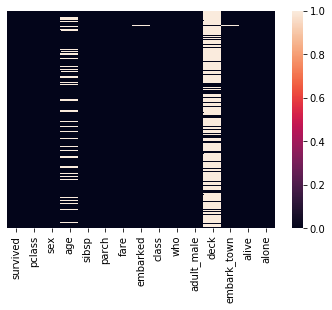

In [43]:
df = sns.load_dataset("titanic")
sns.heatmap(df.isna(), yticklabels=False)
plt.show()

# Machine Learning
## Metrics
### Recall
= Ability of a model to find all the relevant cases in a dataset  

$Recall = \frac{TP}{TP + FN}$

### Precision
= How precisely does the model classify **only the relevant data points**?

$Precision = \frac{TP}{TP + FP}$

### F1 Score
= Harmonic mean of precision and recall (use harmonic mean to punish **extreme** values like 0 or 1)

## KNN
- Scale features!
- use ellbow plot to find good **k**

## K-Means

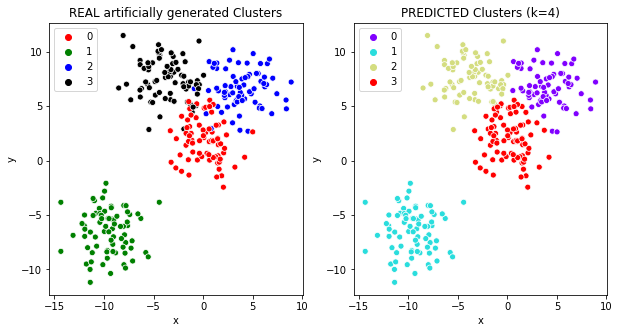

In [40]:
# generate artificial data
from sklearn.datasets import make_blobs
raw_data = make_blobs(300, centers=4, cluster_std=1.8, random_state=101)
data = pd.DataFrame(raw_data[0], columns=["x", "y"])

fig, axes = plt.subplots(1,2, figsize=(10,5))
sns.scatterplot(data=data, x="x", y="y", hue=raw_data[1], palette=["red", "green", "blue", "black"], ax=axes[0])
axes[0].set_title("REAL artificially generated Clusters")

from sklearn.cluster import KMeans
km = KMeans(n_clusters=4)
km.fit(data)
sns.scatterplot(data=data, x="x", y="y", hue=km.predict(data), palette="rainbow", ax=axes[1])
axes[1].set_title("PREDICTED Clusters (k=4)")
plt.show()

Text(0, 0.5, 'SSE')

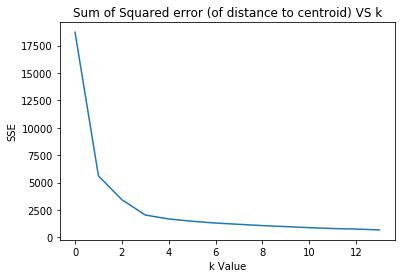

In [39]:
# Ellbow Plot
kms = [KMeans(n_clusters=i).fit(data) for i in range(1, 15)]
sum_squared_error = [kmx.inertia_ for kmx in kms]
plt.plot(sum_squared_error)
plt.title("Sum of Squared error (of distance to centroid) VS k")
plt.xlabel("k Value")
plt.ylabel("SSE")

## Yahoo Finance API

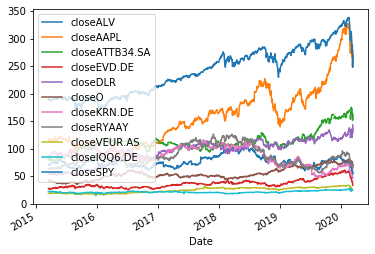

In [8]:
import yfinance as yf
TICKERS = ["ALV", "AAPL", "ATTB34.SA", "EVD.DE", "DLR", "O", "KRN.DE", "RYAAY", "VEUR.AS", "IQQ6.DE", "SPY"]

dfs = []
for ticker in TICKERS:
    dfs.append(pd.DataFrame(yf.Ticker(ticker).history("5y")["Close"]).rename({"Close": ("close"+ticker)}, axis=1))
stocks = pd.concat(dfs, axis=1)
stocks.plot()

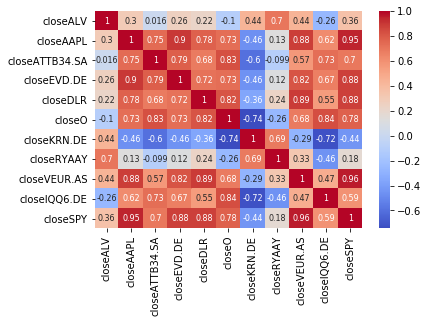

In [9]:
sns.heatmap(stocks.corr(), annot=True, cmap="coolwarm", annot_kws={"size":8})

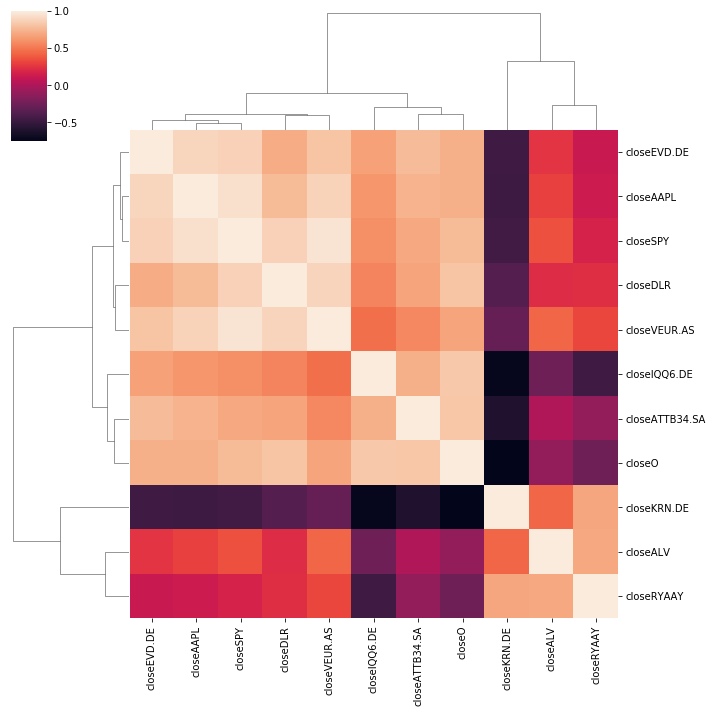

In [10]:
sns.clustermap(stocks.corr())

## Recommender Systems
### Collaborative Filtering (CF)
- Community-based
- based on user's attitutde towards items

### Content-based
- focusses on attributes of items and their similarities

*For examples see Recommender Systems Notebooks*

## Great Idea: BASIC Geoplotting with Scatterplots

In [3]:

from sklearn.datasets import fetch_california_housing
raw = fetch_california_housing()
df = pd.DataFrame(raw["data"], columns=raw["feature_names"])
df = pd.concat([df, pd.Series(raw["target"], name="price")], names=raw["feature_names"], axis=1)
df.head()

MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  price  
0    -122.23  4.526  
1    -122.22  3.585  
2    -122.24  3.521  
3    -122.25  3.413  
4    -122.25  3.422

Text(-120.272743, 33, 'Los Angeles')

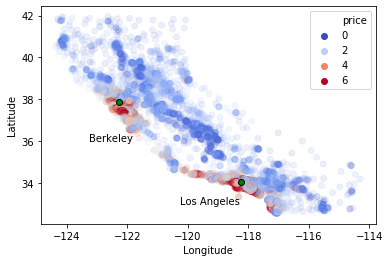

In [26]:
sns.scatterplot(data=df, x="Longitude", y="Latitude", edgecolor=None, alpha=0.1, hue="price", palette="coolwarm")
plt.scatter(x=-122.272743, y=37.871593, color="g", edgecolor="k")
plt.scatter(x=-118.243683, y=34.052235, color="g", edgecolor="k")
# plt.arrow(-122.272743, 37.871593-4, 0, 4, head_width=0.3, head_length=0.5, fc='k', ec='k')
plt.annotate("Berkeley", (-122.272743-1, 36))
plt.annotate("Los Angeles", (-119.272743-1, 33))

Scatterplot matches [THE MAP](https://www.latlong.net/c/?lat=37.88&long=-122.23) quite nicely!